2026-01-02 05:43:52.206459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767332632.473628      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767332632.550474      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Found 8135 images belonging to 2 classes.
Found 2033 images belonging to 2 classes.


2026-01-02 05:44:24.262131: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 118s 454ms/step - accuracy: 0.5040 - loss: 0.7835 - val_accuracy: 0.4993 - val_loss: 0.6933
Epoch 2/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 109s 426ms/step - accuracy: 0.5073 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 3/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 108s 422ms/step - accuracy: 0.5211 - loss: 0.6927 - val_accuracy: 0.5071 - val_loss: 0.6934
Epoch 4/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 105s 411ms/step - accuracy: 0.5600 - loss: 0.6858 - val_accuracy: 0.5096 - val_loss: 0.7001
Epoch 5/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 105s 410ms/step - accuracy: 0.6481 - loss: 0.6219 - val_accuracy: 0.4904 - val_loss: 0.7528


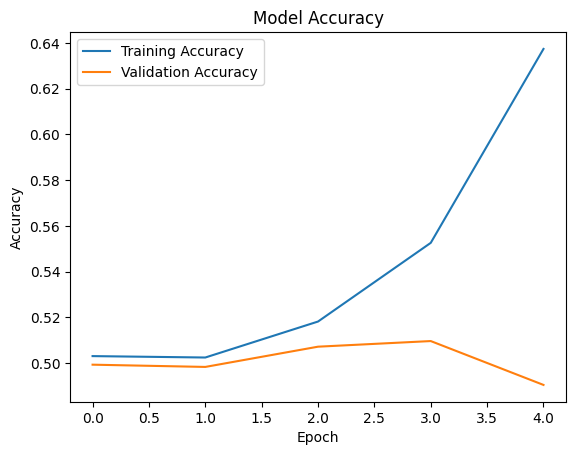

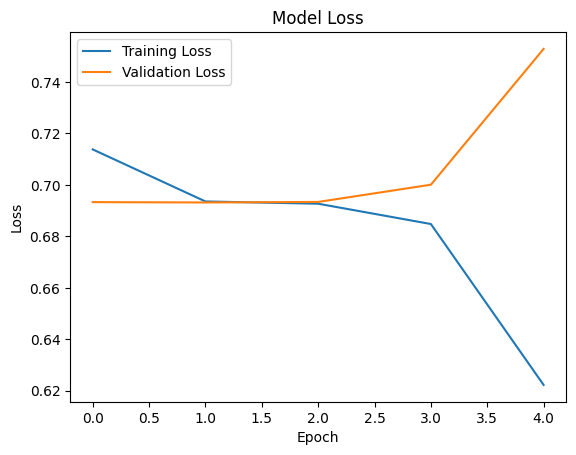

In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

data_dir = "/kaggle/input/car-or-truck"  
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()
